In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

 ### Wygładzanie konturu krzywej przy pomocy splajnów 3-go stopnia. 
#### Punkty p1(−1, −1), p2(0, −1), p3(1, −1), p4(1, 0), p5(1, 1), p6(0, 1), p7(−1, 1), p8(−1, 0), p9(−1, −1) leżą na obwodzie kwadratu [−1, 1] × [−1, 1]. Niech tk = k będą węzłami interpolacji, a (xk, yk) współrzędnymi punktów pk dla k = 1, 2, ..., 9. Wyznaczyć splajn interpolacyjny s(t) stopnia 3 dla (tk, xk), k = 1, 2 . . . , 9 i taki sam splajn interpolacyjny q(t) dla punktów (tk, yk), k = 1, 2, . . . , 9. Sporządzić wykres krzywej (s(t), q(t)), t ∈ [1, 9] i na tym samym rysunku umieścić punkty pk

In [29]:
def interpolate(x, y, xs):
    """
    Funkcja zwraca wektor - wartości funkcji interpolacji dla zadanych argumentów
      xs - float lub np.linspace - x, liczba lub przedział dla których obliczane będą wartości
      x - wektor pierwszych współrzędnych punktów, przez które ma przebiegać funkcja interpolacji
      y - wektor drugich współrzędnych punktów, przez które ma przebiegać funkcja interpolacji
len(x) = len(y)
 L I L1 to dwie osobne macierze trójkątne
    """
    
    rozm = len(x) 
    x = np.asfarray(x)
    y = np.asfarray(y)
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    L = np.empty(rozm)
    L1 = np.empty(rozm-1)
    z = np.empty(rozm)

    L[0] = math.sqrt(2*xdiff[0])
    L1[0] = 0.0
    b0 = 0.0 
    z[0] = b0 / L[0]

    for i in range(1, rozm-1, 1):
        L1[i] = xdiff[i-1] / L[i-1]
        L[i] = math.sqrt(2 * (xdiff[i-1]+xdiff[i]) - L1[i-1] * L1[i-1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i-1] / xdiff[i-1])
        z[i] = (Bi - L1[i-1] * z[i-1]) / L[i]

    i = rozm - 1
    L1[i-1] = xdiff[-1] / L[i-1]
    L[i] = math.sqrt(2 * xdiff[-1] - L1[i-1] * L1[i-1])
    Bi = 0.0
    z[i] = (Bi - L1[i-1] * z[i-1]) / L[i]

    # rozwiazanie dla L transponowanej
    i = rozm-1
    z[i] = z[i] / L[i]
    for i in range(rozm-2, -1, -1):
        z[i] = (z[i] - L1[i-1]*z[i+1])/L[i]

    index = x.searchsorted(xs)
    np.clip(index, 1, rozm-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0
    
    d_j = zi0/(6*hi1)
    c_j = zi1/(6*hi1)
    b_j = (yi1/hi1 - zi1*hi1/6)
    a_j = (yi0/hi1 - zi0*hi1/6)*(xi1-xs)
    


    func = d_j * (xi1-xs)**3 + c_j*(xs-xi0)**2 + b_j *(xs-xi0) + a_j
    
   # print("Splajn 3-go stopnia to:{}*(x - x_j)".format([d_j]), L[0])
    return func

In [36]:
#interpolate(x, y, x_new)

In [31]:
x_pkt = [-1, 0, 1, 1, 1, 0, -1, -1, -1]
y_pkt = [-1, -1, -1, 0, 1, 1, 1, 0, -1]
t_k = [1, 2, 3, 4, 5, 6, 7, 8, 9]
x = t_k
y = x_pkt

x_new = np.linspace(0, 10, 200)

In [32]:
#plt.scatter(x, y)
#plt.plot(x_new, interpolate(x, y, x_new))

In [33]:
#plt.scatter(t_k, y_pkt)
#plt.plot(x_new, interpolate(t_k, y_pkt, x_new))

In [43]:
t = [1,2,3,4,5,6,7,8,9]
x_linspace= np.linspace(1, 9, 100)
#splajn interpolacyjny dla (t_k, y_pkt)
s = interpolate(t_k, y_pkt, x_linspace)
#splajn interpolacyjny dla (t_k, x_pkt)
q = interpolate(x, y, x_linspace)

Text(0.5, 1.0, 'Splajn interpolacyjny złożenia funkcji s(t) i q(t)')

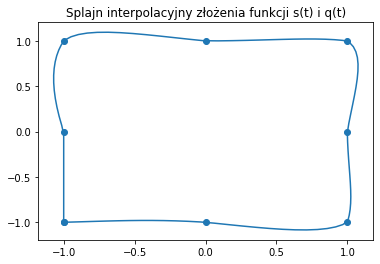

In [44]:
plt.scatter(x_pkt, y_pkt)
plt.plot(s, q)
plt.title("Splajn interpolacyjny złożenia funkcji s(t) i q(t)")